# BIG MART SALES PREDICTION

In [129]:
import pandas as pd


In [130]:
df=pd.read_csv("train.csv")

In [131]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [132]:
df.shape

(8523, 12)

In [133]:
df["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
FDT07     9
FDD38     9
DRE49     9
         ..
FDO33     1
DRF48     1
FDE52     1
FDC23     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [134]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [135]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [136]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [137]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [138]:
df.dtypes.value_counts()

object     7
float64    4
int64      1
dtype: int64

In [139]:
a=df.dtypes=='object'
a

Item_Identifier               True
Item_Weight                  False
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                     False
Outlet_Identifier             True
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
Item_Outlet_Sales            False
dtype: bool

In [140]:
num_var=df.columns[df.dtypes != 'object']
car_vars=df.columns[df.dtypes=='object']
print(num_var)


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [141]:
print(car_vars)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [142]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [143]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [144]:
import matplotlib.pyplot as plt
import numpy as np


In [145]:
#pltPerColumnDistribution(df, 10, 5)

In [146]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [148]:
df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [149]:
len(df.select_dtypes(include='object').columns)

7

In [150]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [151]:
len(df.select_dtypes(include=['int64','float64']).columns)

5

In [152]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [153]:
df.columns[df.isnull().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [154]:
import seaborn as sns
#% matplotlin inline

<Figure size 432x288 with 0 Axes>

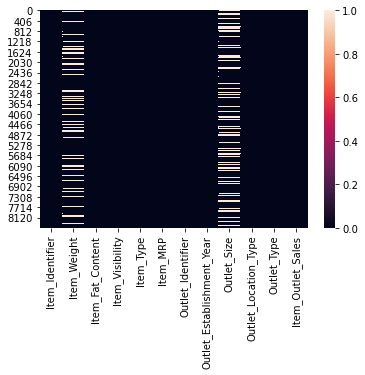

In [155]:
plt.figure()
plt.figure()
sns.heatmap(df.isnull())
plt.show()

In [156]:
df.shape[0]


8523

In [157]:
null_percent=df.isnull().sum()/8523*100

In [158]:
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

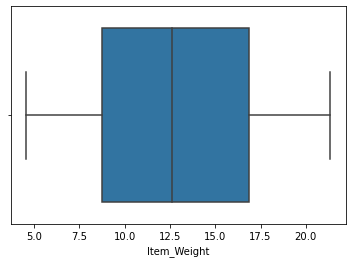

In [159]:
sns.boxplot('Item_Weight',data=df)


In [160]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

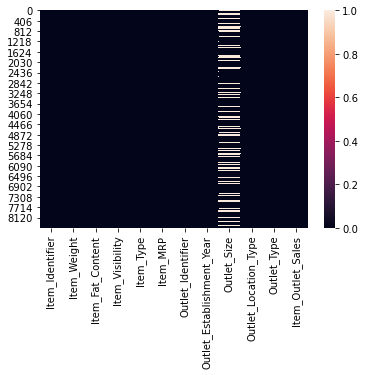

In [161]:
#plt.figure()
sns.heatmap(df.isnull())
plt.show()

In [162]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [163]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

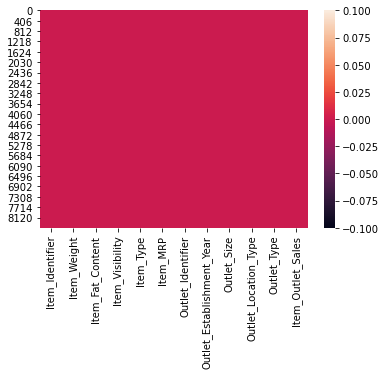

In [164]:
#plt.figure()
sns.heatmap(df.isnull())
plt.show()

In [165]:
df.isnull

<bound method DataFrame.isnull of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

In [166]:
len(df.columns[df.isnull().any()])

0

In [167]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [168]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [169]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [170]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [171]:
# we will convert the outlet_Etablishment_Year to Years_Established
df['Years_Established']=df['Outlet_Establishment_Year'].apply(lambda x: 2021-x)
df=df.drop(columns=['Outlet_Establishment_Year'])


In [172]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


# Exploratory Data Analysis

Univariate analysis

In [173]:
# checking the name of the column whic contain string
df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

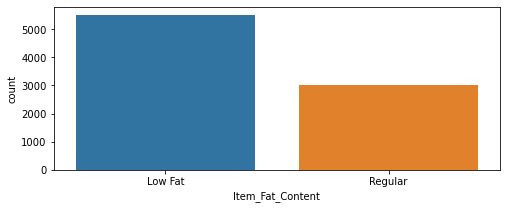

In [174]:
# item fat content
plt.figure(figsize=(8,3))
sns.countplot('Item_Fat_Content',data=df)


People prefers more low fat

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

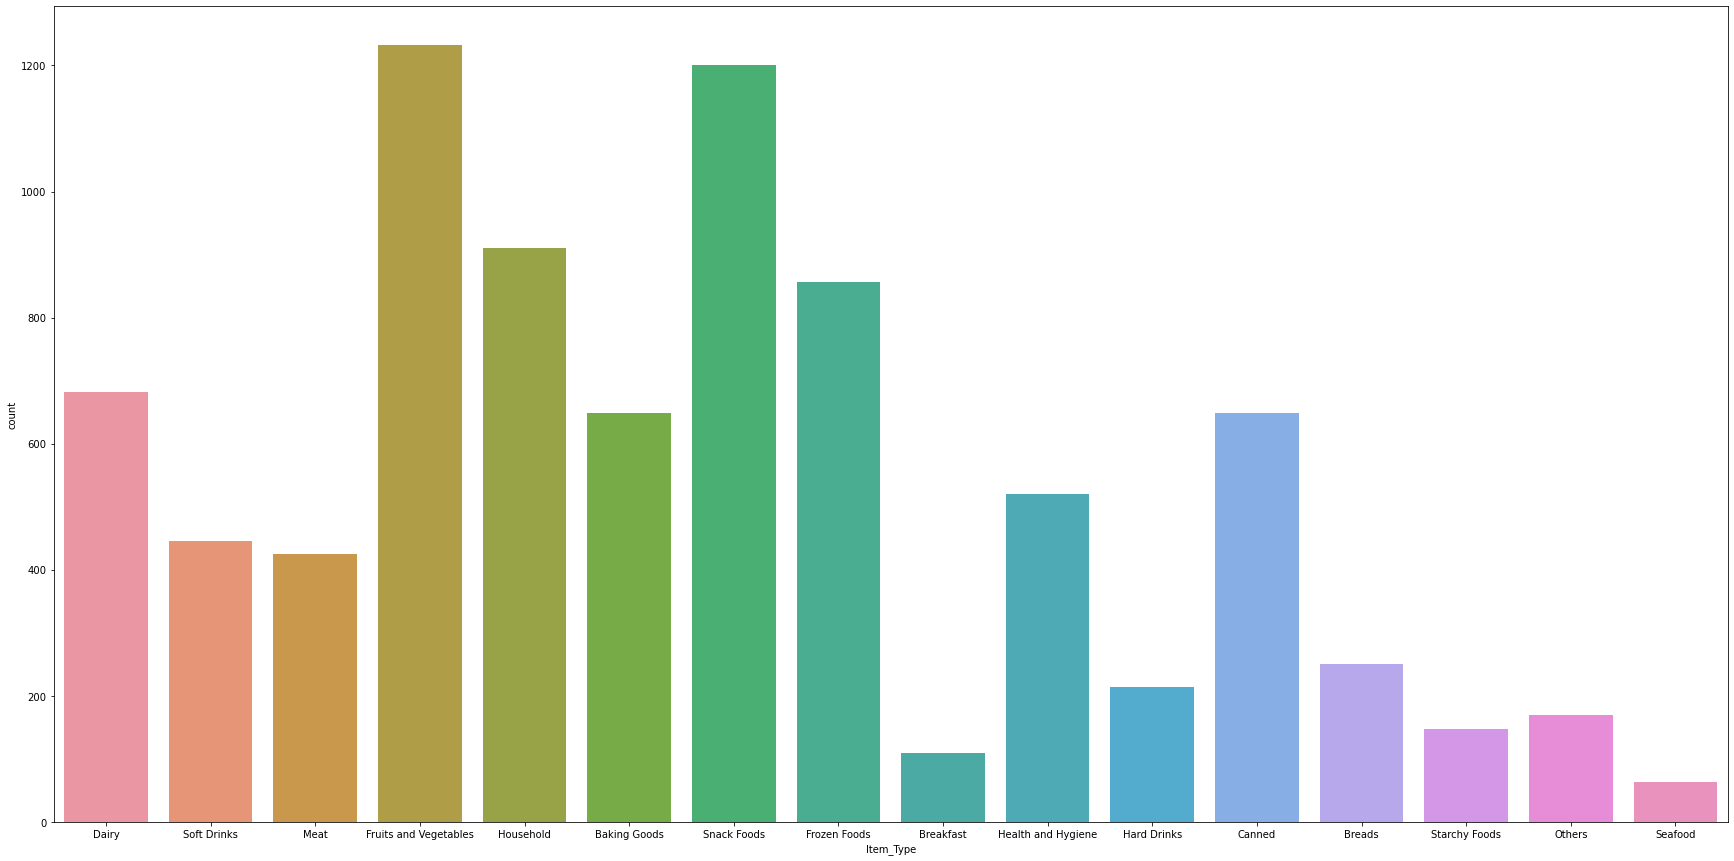

In [175]:
plt.figure(figsize=(30,15))
sns.countplot('Item_Type',data=df)


                                   People brought more fruits & veg
                                   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

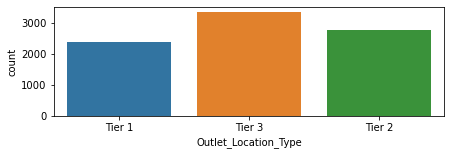

In [176]:
plt.figure(figsize=(7,2))
sns.countplot('Outlet_Location_Type',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

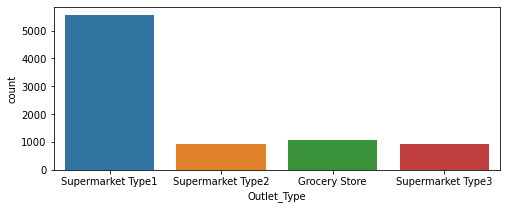

In [177]:
plt.figure(figsize=(8,3))
sns.countplot('Outlet_Type',data=df)

# Now let us do bivariate Analysis

In [178]:
a=df.select_dtypes(include='object').columns

b=df.select_dtypes(exclude='object').columns




In [179]:
a

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

(i)Item fat content vs Item Outlet sales

In [180]:
b

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Years_Established'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

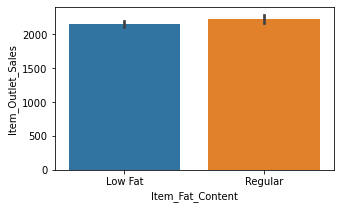

In [181]:
plt.figure(figsize=(5,3))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=df)

Text(0, 0.5, 'Item_Outlet_Sales')

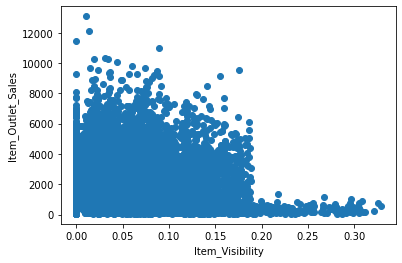

In [182]:
#item visisbility vs outlet sale
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

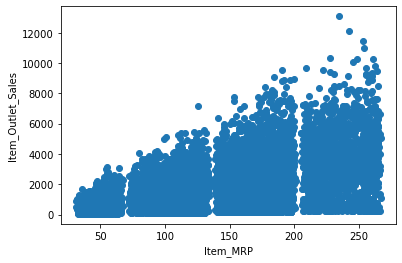

In [183]:
#item MRP vs outlet sale
plt.scatter('Item_MRP','Item_Outlet_Sales',data=df)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Item_Outlet_Sales')

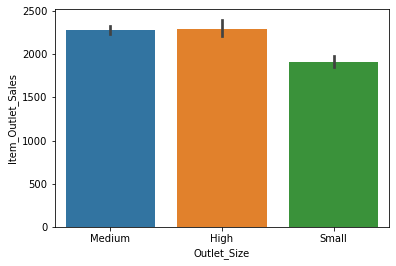

In [184]:
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=df)
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')

In [185]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


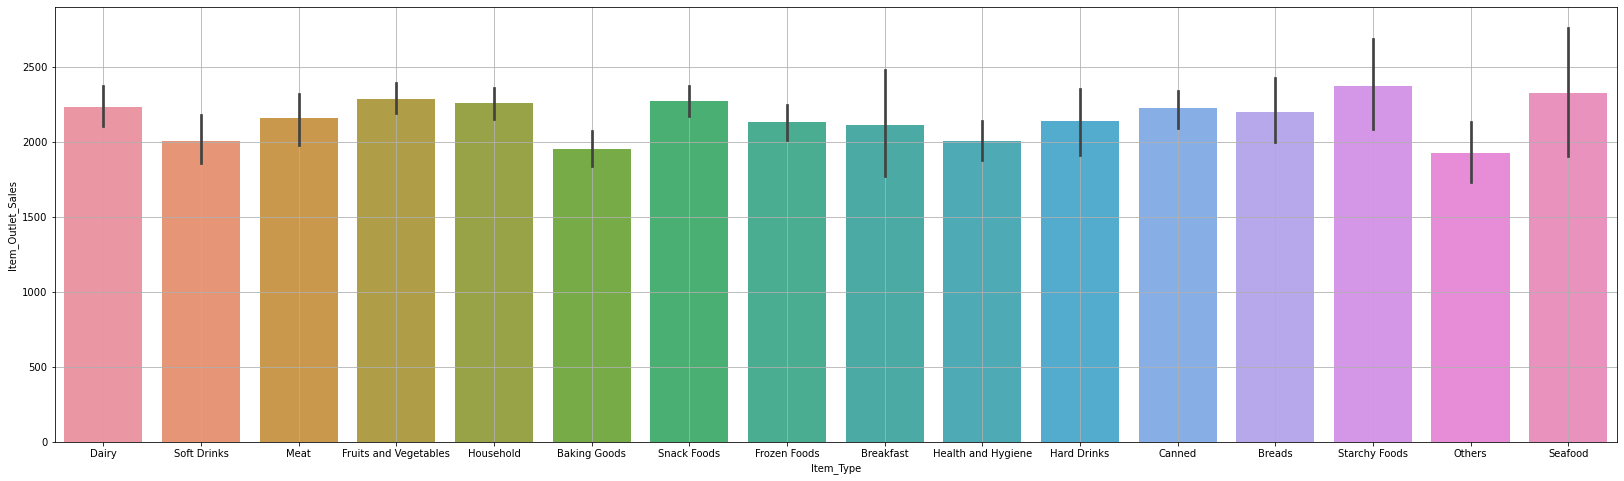

In [186]:
plt.figure(figsize=(28,8))
sns.barplot('Item_Type','Item_Outlet_Sales',data=df)
plt.grid()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


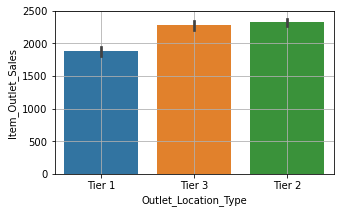

In [187]:
plt.figure(figsize=(5,3))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',data=df)
plt.grid()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


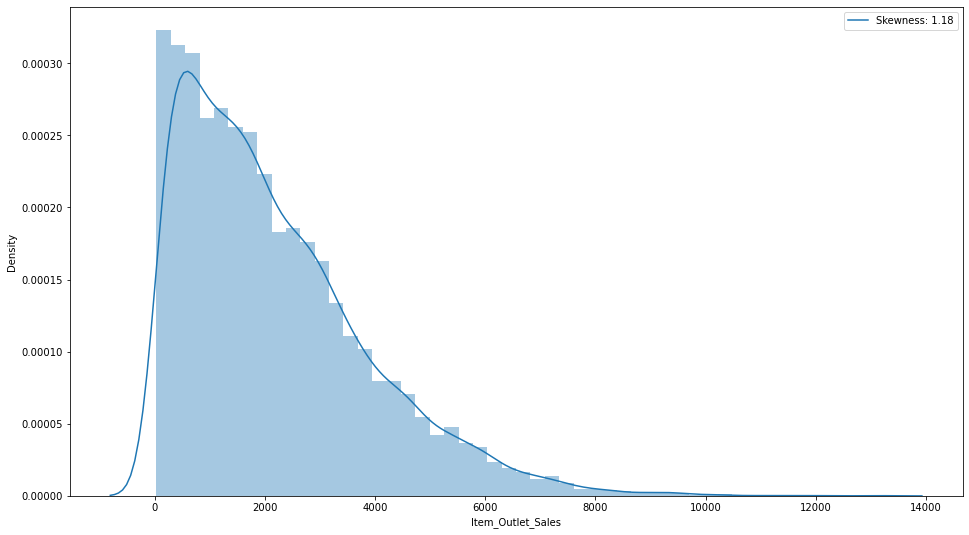

In [188]:
plt.figure(figsize=(16,9))
bar = sns.distplot(df['Item_Outlet_Sales'])
bar.legend(["Skewness: {:.2f}".format(df['Item_Outlet_Sales'].skew())])
plt.show()



In [189]:
s=df.select_dtypes(include ='float64')
s

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


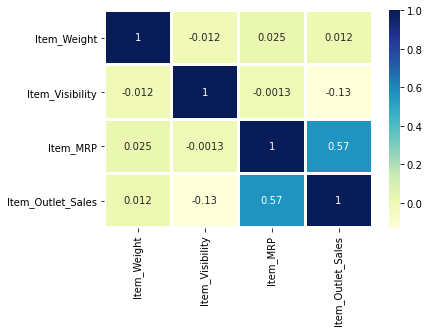

In [190]:
# heat map
b=sns.heatmap(s.corr(),cmap="YlGnBu", annot=True,linewidths=2)

# Feature Engineering

In [191]:
df2=df.copy()

In [192]:
df2.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [193]:
df2.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [194]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a=['Outlet_Identifier','Item_Type']
for i in a:
    df2[i]=le.fit_transform(df2[i])

In [195]:
df3=df2.copy()

In [196]:
df3.Item_Type.unique()


array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [197]:
df3.Outlet_Identifier.unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [198]:
df4=df3.drop(columns='Item_Identifier')

In [199]:
df4

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.300,Low Fat,0.016047,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.920,Regular,0.019278,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.500,Low Fat,0.016760,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.200,Regular,0.000000,6,182.0950,0,Medium,Tier 3,Grocery Store,732.3800,23
4,8.930,Low Fat,0.000000,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,13,214.5218,1,High,Tier 3,Supermarket Type1,2778.3834,34
8519,8.380,Regular,0.046982,0,108.1570,7,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,10.600,Low Fat,0.035186,8,85.1224,6,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,7.210,Regular,0.145221,13,103.1332,3,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [200]:
df4.shape

(8523, 11)

In [201]:
from sklearn.preprocessing import OneHotEncoder
df5=pd.get_dummies(data=df4,drop_first=True)
df5.shape

(8523, 15)

In [202]:
df5

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,4,249.8092,9,3735.1380,22,0,1,0,0,0,1,0,0
1,5.920,0.019278,14,48.2692,3,443.4228,12,1,1,0,0,1,0,1,0
2,17.500,0.016760,10,141.6180,9,2097.2700,22,0,1,0,0,0,1,0,0
3,19.200,0.000000,6,182.0950,0,732.3800,23,1,1,0,0,1,0,0,0
4,8.930,0.000000,9,53.8614,1,994.7052,34,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,1,2778.3834,34,0,0,0,0,1,1,0,0
8519,8.380,0.046982,0,108.1570,7,549.2850,19,1,1,0,1,0,1,0,0
8520,10.600,0.035186,8,85.1224,6,1193.1136,17,0,0,1,1,0,1,0,0
8521,7.210,0.145221,13,103.1332,3,1845.5976,12,1,1,0,0,1,0,1,0


High skewness is present input feature item_visibility which is not desirable.So we need to reduce it to Normal distrubution

In [203]:
df5['Item_Visibility']=np.cbrt(df5['Item_Visibility'])


In [204]:
#df5['Item_Visibility']=np.log(df5['Item_Visibility'])

In [205]:
b=df5['Item_Visibility']

In [206]:
import math
#ALOT = 0.1
for x in b:
    if(x== math.inf):
        x=1
    if(x==-math.inf):
        x=0.1
        

In [207]:
b

0       0.252232
1       0.268136
2       0.255913
3       0.000000
4       0.000000
          ...   
8518    0.384362
8519    0.360838
8520    0.327686
8521    0.525625
8522    0.355368
Name: Item_Visibility, Length: 8523, dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

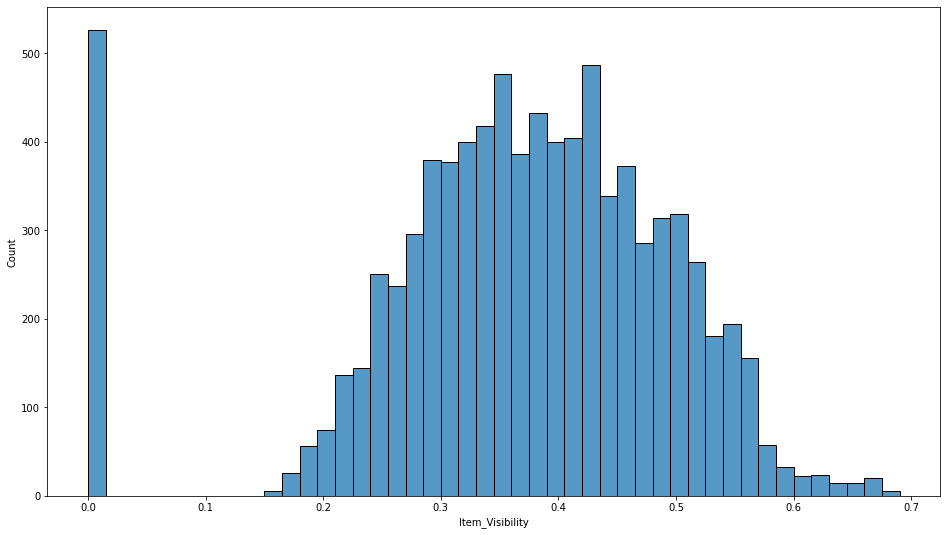

In [208]:
plt.figure(figsize=(16,9))
sns.histplot(data=b)

In [209]:
def remove_outliers(dataframe, column):
    
    Q3 = dataframe[column].quantile(0.75)
    Q1 = dataframe[column].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    df_no_outlier = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

    return df_no_outlier

In [210]:
c= remove_outliers(df5, 'Item_Visibility')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

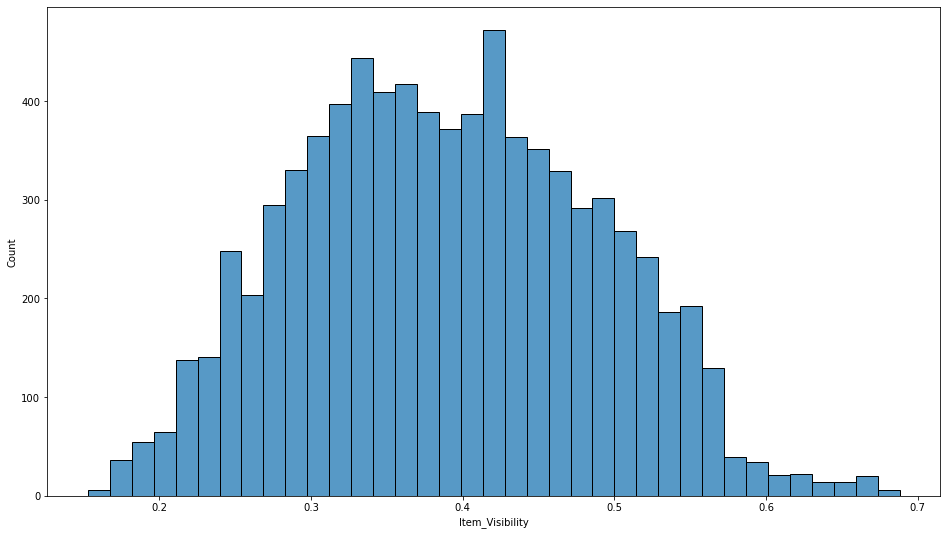

In [211]:
plt.figure(figsize=(16,9))
sns.histplot(data=c['Item_Visibility'])

In [212]:
df5.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Years_Established',
       'Item_Fat_Content_Regular', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [213]:
df5.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Years_Established',
       'Item_Fat_Content_Regular', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [214]:
y=df5['Item_Outlet_Sales']

<AxesSubplot:xlabel='Item_Outlet_Sales'>

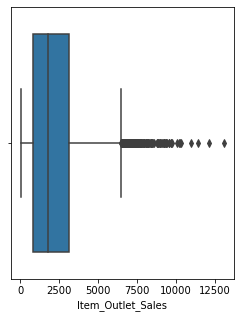

In [215]:
plt.figure(figsize=(4,5))
sns.boxplot(x='Item_Outlet_Sales',data=df)

In [216]:
df6= remove_outliers(df5, 'Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Outlet_Sales'>

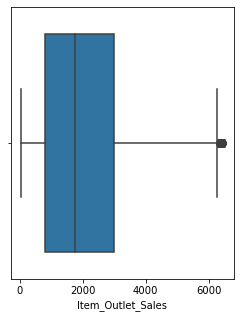

In [217]:
plt.figure(figsize=(4,5))
sns.boxplot(x='Item_Outlet_Sales',data=df6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


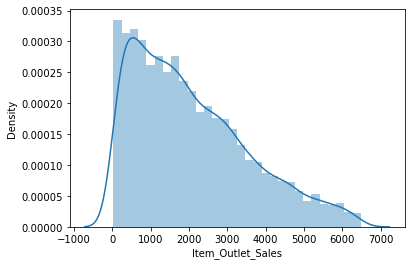

In [218]:
bar = sns.distplot(df6['Item_Outlet_Sales'])

In [219]:
df6['Item_Outlet_Sales']=np.cbrt(df6['Item_Outlet_Sales'])

<ipython-input-219-fe12a9b8b316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Item_Outlet_Sales']=np.cbrt(df6['Item_Outlet_Sales'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


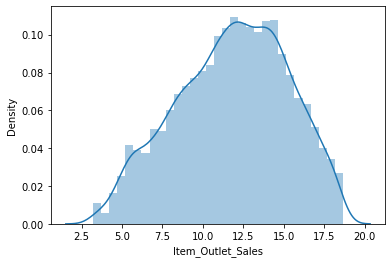

In [220]:
bar = sns.distplot(df6['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility'>

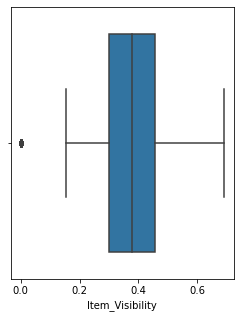

In [221]:
plt.figure(figsize=(4,5))
sns.boxplot(x='Item_Visibility',data=df6)

In [222]:
df6.Item_Visibility.min()

0.0

In [223]:
df6

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.252232,4,249.8092,9,15.515611,22,0,1,0,0,0,1,0,0
1,5.920,0.268136,14,48.2692,3,7.625576,12,1,1,0,0,1,0,1,0
2,17.500,0.255913,10,141.6180,9,12.800240,22,0,1,0,0,0,1,0,0
3,19.200,0.000000,6,182.0950,0,9.013888,23,1,1,0,0,1,0,0,0
4,8.930,0.000000,9,53.8614,1,9.982319,34,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.384362,13,214.5218,1,14.058233,34,0,0,0,0,1,1,0,0
8519,8.380,0.360838,0,108.1570,7,8.189661,19,1,1,0,1,0,1,0,0
8520,10.600,0.327686,8,85.1224,6,10.606219,17,0,0,1,1,0,1,0,0
8521,7.210,0.525625,13,103.1332,3,12.266265,12,1,1,0,0,1,0,1,0


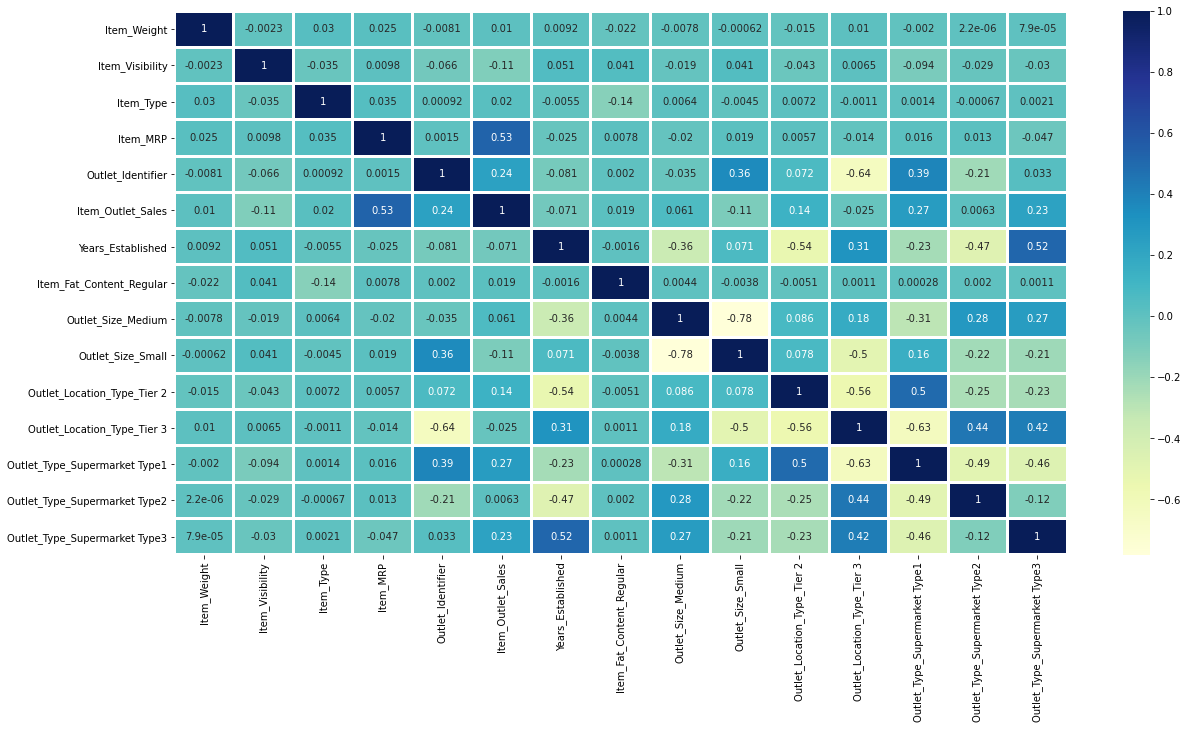

In [224]:
plt.figure(figsize=(20,10))
b=sns.heatmap(df6.corr(),cmap="YlGnBu", annot=True,linewidths=2)

In [225]:
x=df6.drop(['Item_Outlet_Sales'],axis=1)

In [226]:
y=df6['Item_Outlet_Sales']

In [227]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x1=scaler.fit_transform(x)
#x=pd.DataFrame(data=x1,columns=x.columns)

In [228]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.252232,4,249.8092,9,22,0,1,0,0,0,1,0,0
1,5.920,0.268136,14,48.2692,3,12,1,1,0,0,1,0,1,0
2,17.500,0.255913,10,141.6180,9,22,0,1,0,0,0,1,0,0
3,19.200,0.000000,6,182.0950,0,23,1,1,0,0,1,0,0,0
4,8.930,0.000000,9,53.8614,1,34,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.384362,13,214.5218,1,34,0,0,0,0,1,1,0,0
8519,8.380,0.360838,0,108.1570,7,19,1,1,0,1,0,1,0,0
8520,10.600,0.327686,8,85.1224,6,17,0,0,1,1,0,1,0,0
8521,7.210,0.525625,13,103.1332,3,12,1,1,0,0,1,0,1,0


In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [230]:
X_train.shape

(6669, 14)

In [231]:
X_test.shape

(1668, 14)

In [232]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [233]:
y_predict = lr.predict(X_test)

In [234]:
lr.score(X_test,y_test)

0.667016922064779

In [235]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None)

In [236]:
cross_val_score(LinearRegression(), x, y,cv=cv )

array([0.66769026, 0.65373975, 0.65182988, 0.66636785, 0.69684681])

In [237]:
import xgboost 

In [238]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[200],
                'max_depth':[5], 
                'min_samples_leaf':[100],
                'n_jobs':[4],
                'random_state':[101]
            }
        },
        'regressor_xgb': {
            'model':XGBRFRegressor(),
            'params':{
                'n_estimators':[2500], 
                #'learning_rate':[.02], 
                #'objective':['reg:squarederror'],
                'n_jobs':[10], 
                'colsample_bytree':[.8], 
                'max_depth':[8],
                'random_state':[42], 
                #'importance_type':['total_gain'],
                'reg_alpha':[.5]
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.667295,{'normalize': True}
1,lasso,0.328735,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.328775,"{'criterion': 'mse', 'splitter': 'best'}"
3,Random forest,0.648871,"{'max_depth': 5, 'min_samples_leaf': 100, 'n_e..."
4,regressor_xgb,0.673657,"{'colsample_bytree': 0.8, 'max_depth': 8, 'n_e..."


In [239]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.252232,4,249.8092,9,22,0,1,0,0,0,1,0,0
1,5.920,0.268136,14,48.2692,3,12,1,1,0,0,1,0,1,0
2,17.500,0.255913,10,141.6180,9,22,0,1,0,0,0,1,0,0
3,19.200,0.000000,6,182.0950,0,23,1,1,0,0,1,0,0,0
4,8.930,0.000000,9,53.8614,1,34,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.384362,13,214.5218,1,34,0,0,0,0,1,1,0,0
8519,8.380,0.360838,0,108.1570,7,19,1,1,0,1,0,1,0,0
8520,10.600,0.327686,8,85.1224,6,17,0,0,1,1,0,1,0,0
8521,7.210,0.525625,13,103.1332,3,12,1,1,0,0,1,0,1,0


In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Item_Weight
    x[1] = Item_Visibility
    x[2] = Item_Type
    x[3] = Item_MRP
    x[4] = Outlet_Identifier
    x[5]= Years_Established
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [240]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34
